In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

In [2]:
main_df = pd.read_csv("main_df.csv", index_col = 0)

In [3]:
main_df.head()

,date,username,tweet,retweets_count,search_term,c_tweet,tokenized,filtered,delisted,sentiment,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,subjectivity_score,max_topic,yes_retweets,yes_likes,yes_replies
0,2020-12-01,coolmuster,#iPhone12 #Android iPhone 12 vs Android’s best...,0.0,iphone 12,iphone android iphone vs android best it time ...,"['iphone', 'android', 'iphone', 'v', 'android'...","android, android, best, time, consider, switch...","android, android, best, time, consider, switch...",positive,0.887465,0.012504,0.012503,0.012504,0.012504,0.012504,0.012506,0.012503,0.012504,0.012503,0.300000,topic0,0,0,0
1,2020-12-01,nanaakuamensah4,@cuppymusic I'm asking DJ cuppy Please I want ...,0.0,iphone 12,asking dj cuppy please want an iphone,"['asking', 'dj', 'cuppy', 'please', 'want', 'a...","asking, dj, cuppy, please, want","asking, cuppy, please, want",positive,0.016679,0.016674,0.016674,0.849927,0.016674,0.016674,0.016674,0.016674,0.016674,0.016674,0.000000,topic3,0,0,0
2,2020-12-01,naija_pr,The moment Mercy Eke sprays her friend $3000 c...,1.0,iphone 12,the moment mercy eke sprays her friend cash an...,"['the', 'moment', 'mercy', 'eke', 'spray', 'he...","moment, mercy, eke, spray, friend, cash, gave,...","moment, mercy, eke, spray, friend, cash, gave,...",positive,0.011123,0.011122,0.011122,0.899898,0.011122,0.011122,0.011122,0.011126,0.011122,0.011122,0.000000,topic3,1,1,0
3,2020-12-01,holliebear80,@CraigStrife Aww back at you Mr S 😘 &amp; Appl...,0.0,iphone 12,aww back at you mr amp apple still the iphone ...,"['aww', 'back', 'at', 'you', 'mr', 'amp', 'app...","aww, back, mr, amp, apple, still, still, arriv...","aww, back, amp, still, still, arrived, guessin...",positive,0.302723,0.474885,0.000000,0.110264,0.086025,0.000000,0.000000,0.000000,0.000000,0.000000,0.505556,topic1,0,0,0
4,2020-12-01,justabussy,@PicsArtStudio umm I can’t press on the search...,0.0,iphone 12,umm can press on the search bar on the iphone ...,"['umm', 'can', 'press', 'on', 'the', 'search',...","umm, press, search, bar, hurry, fix","umm, press, search, bar, hurry, fix",neutral,0.611028,0.014312,0.014303,0.014312,0.274515,0.014303,0.014307,0.014301,0.014309,0.014309,0.000000,topic0,0,1,1


In [4]:
main_df.shape

(983246, 25)

In [6]:
# %%time
#  # --> this cell took 9 min 54 seconds to run
# from sklearn.feature_extraction.text import TfidfVectorizer 

# rf_feats = main_df.delisted.values
# tfidfconverter = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7)  

# X = tfidfconverter.fit_transform(rf_feats).toarray()

# tfidf_df = pd.DataFrame(X)
# tfidf_df.to_csv("tfidf_df.csv") 


In [5]:
%%time 
#this file takes 2 min and 1 sec to import
tfidf_df = pd.read_csv("tfidf_df.csv", index_col = 0) # 4GB file

CPU times: user 1min 25s, sys: 21.3 s, total: 1min 46s
Wall time: 1min 57s


In [6]:
features = ["topic0", "topic1", "topic2", "topic3", "topic4", "topic5", "topic6", 
            "topic7", "topic8", "topic9", "yes_likes", "yes_retweets",
            "subjectivity_score", "sentiment"]

In [7]:
featured_df = main_df[features]

In [8]:
%%time
# cell took 25.1 seconds
modeling_df = pd.concat([featured_df, tfidf_df], axis = 1)

CPU times: user 3.15 s, sys: 5.37 s, total: 8.52 s
Wall time: 11.3 s


In [9]:
modeling_df.shape

(983246, 1014)

In [10]:
modeling_df.head()

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,yes_likes,yes_retweets,subjectivity_score,sentiment,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,...,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.887465,0.012504,0.012503,0.012504,0.012504,0.012504,0.012506,0.012503,0.012504,0.012503,0,0,0.300000,positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.806512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.403021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.016679,0.016674,0.016674,0.849927,0.016674,0.016674,0.016674,0.016674,0.016674,0.016674,0,0,0.000000,positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.733586,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.432422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.011123,0.011122,0.011122,0.899898,0.011122,0.011122,0.011122,0.011126,0.011122,0.011122,1,1,0.000000,positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Due to time constraints for this project, we selected only every 40th row of 983,246 observations conduct the train test split for modeling. This leaves us with 24,582 observations. 

In [110]:
df_shuffled = modeling_df.groupby("sentiment", as_index = False,group_keys=False).apply(lambda s: s.sample(30000,replace=False))

In [111]:
df_shuffled.shape

(90000, 1014)

In [112]:
df_shuffled.isna().sum().sum()

0

In [113]:
df_shuffled.sentiment

707328    negative
75005     negative
978695    negative
707072    negative
189593    negative
            ...   
112065    positive
326588    positive
104925    positive
126265    positive
55730     positive
Name: sentiment, Length: 90000, dtype: object

## Test-Train split

In [114]:
X = df_shuffled[features]
y = df_shuffled["sentiment"].values
X.drop(columns=["sentiment"],inplace=True)


### Train-test split only on Topic scores 

In [115]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [117]:
print(X_train.shape, y_train.shape)

(72000, 13) (72000,)


## Baseline Models without vector

#### Multinomial NB

In [118]:
%%time
from sklearn.naive_bayes import MultinomialNB 

CPU times: user 15 µs, sys: 10 µs, total: 25 µs
Wall time: 62 µs


In [119]:
Multi_nb = MultinomialNB()
Multi_nb.fit(X_train, y_train)

MultinomialNB()

In [120]:
%%time
y_pred_NB = Multi_nb.predict(X_test)
multi_NB_cm = confusion_matrix(y_test, y_pred_NB)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_NB))
print("-"*60)                         
print(classification_report(y_test, y_pred_NB))

Accuracy is: 0.4136111111111111
------------------------------------------------------------
              precision    recall  f1-score   support

    negative       0.37      0.61      0.46      5890
     neutral       0.49      0.50      0.49      6050
    positive       0.42      0.13      0.20      6060

    accuracy                           0.41     18000
   macro avg       0.42      0.42      0.38     18000
weighted avg       0.43      0.41      0.38     18000

CPU times: user 945 ms, sys: 129 ms, total: 1.07 s
Wall time: 555 ms


#### Random Forest Classifier

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rfc_classifier = RandomForestClassifier(n_estimators = 300, criterion = "entropy", random_state = 0)

In [123]:
%%time
rfc_classifier.fit(X_train, y_train)
y_pred_RF = rfc_classifier.predict(X_test)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_RF))
print("-"*60)                         
print(classification_report(y_test, y_pred_RF))

Accuracy is: 0.4587222222222222
------------------------------------------------------------
              precision    recall  f1-score   support

    negative       0.38      0.33      0.35      5890
     neutral       0.54      0.62      0.58      6050
    positive       0.43      0.42      0.43      6060

    accuracy                           0.46     18000
   macro avg       0.45      0.46      0.45     18000
weighted avg       0.45      0.46      0.45     18000

CPU times: user 1min 15s, sys: 1.05 s, total: 1min 16s
Wall time: 1min 17s


#### Decision Tree Classifier

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
%%time
dtc_classifier = DecisionTreeClassifier(random_state = 0)
dtc_classifier.fit(X_train, y_train)

CPU times: user 1.12 s, sys: 14.4 ms, total: 1.13 s
Wall time: 1.15 s


In [126]:
y_pred_DT = dtc_classifier.predict(X_test)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_DT))
print("-"*60)                         
print(classification_report(y_test, y_pred_DT))

Accuracy is: 0.4062777777777778
------------------------------------------------------------
              precision    recall  f1-score   support

    negative       0.35      0.36      0.36      5890
     neutral       0.47      0.47      0.47      6050
    positive       0.39      0.38      0.39      6060

    accuracy                           0.41     18000
   macro avg       0.41      0.41      0.41     18000
weighted avg       0.41      0.41      0.41     18000



# Baseline Models with the vector

In [127]:
X = df_shuffled
y = df_shuffled["sentiment"].values
X.drop(columns=["sentiment"],inplace=True)

In [128]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size=0.2, random_state=0)

In [129]:
print(X_train_tfidf.shape, y_train_tfidf.shape)

(72000, 1013) (72000,)


### MultinomialNB with tfidf vector

In [130]:
%%time
Multi_nb = MultinomialNB()
Multi_nb.fit(X_train_tfidf, y_train_tfidf)

CPU times: user 804 ms, sys: 215 ms, total: 1.02 s
Wall time: 808 ms


In [131]:
%%time
y_pred_NB_tfidf = Multi_nb.predict(X_test_tfidf)
multi_NB_tfidf_cm = confusion_matrix(y_test_tfidf, y_pred_NB_tfidf)
print("Accuracy is:", metrics.accuracy_score(y_test_tfidf, y_pred_NB_tfidf))
print("-"*60)                         
print(classification_report(y_test_tfidf, y_pred_NB_tfidf))

Accuracy is: 0.6929444444444445
------------------------------------------------------------
              precision    recall  f1-score   support

    negative       0.62      0.65      0.64      5890
     neutral       0.70      0.73      0.71      6050
    positive       0.77      0.70      0.73      6060

    accuracy                           0.69     18000
   macro avg       0.70      0.69      0.69     18000
weighted avg       0.70      0.69      0.69     18000

CPU times: user 1.3 s, sys: 237 ms, total: 1.54 s
Wall time: 612 ms


### Random Forest Classifer with TFIDF vector

In [132]:
rfc_tfidf_classifier = RandomForestClassifier(n_estimators = 200, criterion = "entropy", random_state = 0, verbose=1, n_jobs = -1)


In [133]:
%%time
rfc_tfidf_classifier.fit(X_train_tfidf, y_train_tfidf)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min


CPU times: user 8min 9s, sys: 5.58 s, total: 8min 14s
Wall time: 1min 26s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.4min finished


RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       random_state=0, verbose=1)

In [134]:
%%time
y_pred_RF_tfidf = rfc_tfidf_classifier.predict(X_test_tfidf)
print("Accuracy is:", metrics.accuracy_score(y_test_tfidf, y_pred_RF_tfidf))
print("-"*60)                         
print(classification_report(y_test_tfidf, y_pred_RF_tfidf))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.7s finished


Accuracy is: 0.7294444444444445
------------------------------------------------------------
              precision    recall  f1-score   support

    negative       0.68      0.61      0.65      5890
     neutral       0.71      0.84      0.77      6050
    positive       0.80      0.73      0.76      6060

    accuracy                           0.73     18000
   macro avg       0.73      0.73      0.73     18000
weighted avg       0.73      0.73      0.73     18000

CPU times: user 4.61 s, sys: 328 ms, total: 4.94 s
Wall time: 1.35 s


### Decision Tree Classifier with TFIDF vector

In [135]:
%%time
dtc_classifier_tfidf = DecisionTreeClassifier(random_state = 0)
dtc_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

CPU times: user 59.7 s, sys: 992 ms, total: 1min
Wall time: 1min 1s


In [136]:
%%time
y_pred_DT_tfidf = dtc_classifier_tfidf.predict(X_test_tfidf)
print("Accuracy is:", metrics.accuracy_score(y_test_tfidf, y_pred_DT_tfidf))
print("-"*60)                         
print(classification_report(y_test_tfidf, y_pred_DT_tfidf))

Accuracy is: 0.6254444444444445
------------------------------------------------------------
              precision    recall  f1-score   support

    negative       0.56      0.56      0.56      5890
     neutral       0.66      0.66      0.66      6050
    positive       0.66      0.65      0.66      6060

    accuracy                           0.63     18000
   macro avg       0.62      0.62      0.62     18000
weighted avg       0.63      0.63      0.63     18000

CPU times: user 579 ms, sys: 61.9 ms, total: 641 ms
Wall time: 654 ms


In [137]:
print("All accuracy scores:") 
print("Accuracy without TFIDFVectors")
print("Accuracy for Multinomial NB:", metrics.accuracy_score(y_test, y_pred_NB))
print("Accuracy for RandomForest:", metrics.accuracy_score(y_test, y_pred_RF))
print("Accuracy for DecisionTree:", metrics.accuracy_score(y_test, y_pred_DT))
print("-"*70)
print("Accuracy with TFIDFVectors")
print("Accuracy for Multinomial NB:", metrics.accuracy_score(y_test_tfidf, y_pred_NB_tfidf))
print("Accuracy for RandomForest:", metrics.accuracy_score(y_test_tfidf, y_pred_RF_tfidf))
print("Accuracy for DecisionTree:", metrics.accuracy_score(y_test_tfidf, y_pred_DT_tfidf))

All accuracy scores:
Accuracy without TFIDFVectors
Accuracy for Multinomial NB: 0.4136111111111111
Accuracy for RandomForest: 0.4587222222222222
Accuracy for DecisionTree: 0.4062777777777778
----------------------------------------------------------------------
Accuracy with TFIDFVectors
Accuracy for Multinomial NB: 0.6929444444444445
Accuracy for RandomForest: 0.7294444444444445
Accuracy for DecisionTree: 0.6254444444444445


# Final Model

We will focus specifically on the dataframe with TFIDF vector since it produces the best baseline result.


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [227]:
%%time
rfc = RandomForestClassifier(n_estimators = 200, criterion = "gini",
                             random_state = 0, class_weight = "balanced",
                             verbose=1, n_jobs=-1)

CPU times: user 113 µs, sys: 378 µs, total: 491 µs
Wall time: 520 µs


In [236]:
param_dict={'min_samples_leaf':range(1,2,1), 'max_depth': range(200,202,2)}

In [237]:
%%time
grid_tree = GridSearchCV(rfc, param_dict, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)


grid_tree.fit(X_train_tfidf, y_train_tfidf)
#rfc.fit(X_train_tfidf, y_train_tfidf)

grid_tree_pred = grid_tree.predict(X_test_tfidf)
print("Accuracy is:", metrics.accuracy_score(y_test_tfidf, grid_tree_pred))
print("-"*60)                         
print(classification_report(y_test_tfidf, grid_tree_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.7min remaining:  8.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.6s finished


Accuracy is: 0.7336111111111111
------------------------------------------------------------
              precision    recall  f1-score   support

    negative       0.68      0.63      0.65      5890
     neutral       0.72      0.83      0.77      6050
    positive       0.80      0.74      0.77      6060

    accuracy                           0.73     18000
   macro avg       0.73      0.73      0.73     18000
weighted avg       0.74      0.73      0.73     18000

CPU times: user 8min 43s, sys: 5.04 s, total: 8min 48s
Wall time: 7min 6s


In [238]:
# @ max depth of 50 = 0.70, 60= 0.71, 80=0.72
print(grid_tree.best_score_)

print(grid_tree.best_params_)

print(grid_tree.best_estimator_)

print(grid_tree.best_estimator_.feature_importances_)

0.7254583333333333
{'max_depth': 200, 'min_samples_leaf': 1}
RandomForestClassifier(class_weight='balanced', max_depth=200, n_estimators=200,
                       n_jobs=-1, random_state=0, verbose=1)
[0.01756652 0.01617461 0.01533986 ... 0.00114571 0.00052051 0.00024353]


In [240]:
d = {'Stats':X.columns,'FI':grid_tree.best_estimator_.feature_importances_}

In [241]:
df = pd.DataFrame(d)

In [242]:
df = df.sort_values(by='FI', ascending=0)


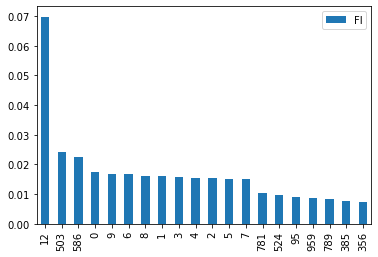

In [243]:
df[:20].plot(kind="bar")

In [104]:
import gensim

In [145]:
dataset = [d.split() for d in main_df["delisted"]]

vocab = gensim.corpora.Dictionary(dataset)


In [244]:
feat_imp = df[:10]

In [245]:
feat_imp

,Stats,FI
12,subjectivity_score,0.069849
503,490,0.024188
586,573,0.022378
0,topic0,0.017567
9,topic9,0.016858
6,topic6,0.016634
8,topic8,0.016190
1,topic1,0.016175
3,topic3,0.015598
4,topic4,0.015460


In [246]:
x=feat_imp.Stats
y=feat_imp.FI

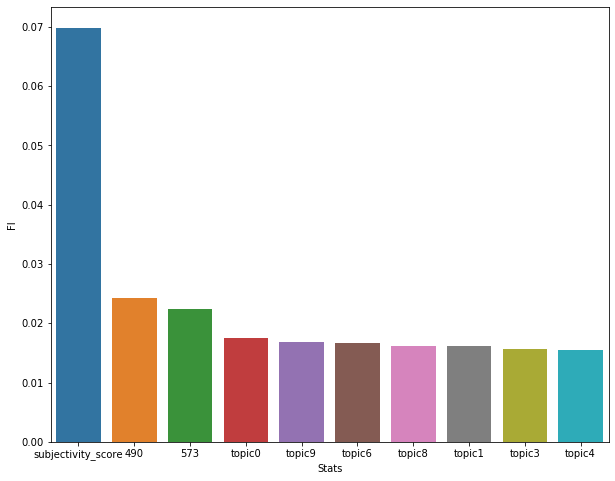

In [247]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=x, y=y, data = feat_imp)



In [248]:
vocab[490]

'fan,'

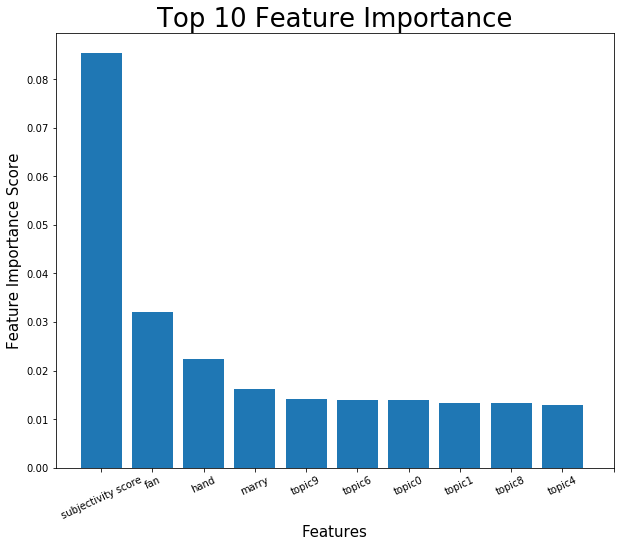

In [217]:
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x=x, height=y, data = feat_imp)

x = ['subjectivity score', 'fan', 'hand', 'marry', 'topic9', 'topic6', 'topic0', 'topic1', 'topic8', 'topic4']
l = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ax.set_xticks(l)
ax.set_xticklabels(x)
plt.xticks(rotation=25)
plt.title("Top 10 Feature Importance", fontsize=26)
plt.ylabel("Feature Importance Score", fontsize=15)
plt.xlabel("Features", fontsize=15)
plt.savefig('images/feature_importance.png', bbox_inches = "tight");